In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
import re
from Utils import *
from variableUtils import *
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
workbookpath = 'FullSpreadsheets\CAF+v0.1_December+5,+2024\CAF v0.1_December 5, 2024 split.xlsx'
folder, file, ext = getFolderandFileName(workbookpath)
df_ = pd.read_excel(workbookpath, index_col=0)
df_.head()

,Student Given Name,Student Family Name,Date,011_MC1_student (COE),011_MC2_student (COE),011_MC3_student (COE),011_MC4_student (COE),011_MC5_student (COE),011_MC6_student (COE),011_MC7_student (COE),011_MC8_student (COE),011_MC9_student (COE),011_MC10_student (COE),011_MC11_student (COE),011_MC12_student (COE),011_MC13_student (COE),011_MC14_student (COE),011_MC15_student (COE),011_MC16_student (COE),011_MC1_supervisor (COE),011_MC2_supervisor (COE),011_MC3_supervisor (COE),011_MC4_supervisor (COE),011_MC5_supervisor (COE),011_MC6_supervisor (COE),011_MC7_supervisor (COE),011_MC8_supervisor (COE),011_MC9_supervisor (COE),011_MC10_supervisor (COE),011_MC11_supervisor (COE),011_MC12_supervisor (COE),011_MC13_supervisor (COE),011_MC14_supervisor (COE),011_MC15_supervisor (COE),011_MC16_supervisor (COE),PEC_MC1_student,PEC_MC2_student,PEC_MC1_supervisor,PEC_MC2_supervisor,ICC_MC1_student,ICC_MC2_student,ICC_MC1_supervisor,ICC_MC2_supervisor,RKC_MC1_student,RKC_MC1_supervisor,CC_MC1_student,CC_MC1_supervisor,PS,CS,TS,ES,Cohort,Subject,Sim or Clinic,Sim or Clinic_999_TEXT,Critical incident,CI Details,Patient,Complexity,Patient Age,Cohort.1,Subject.1,Role,Clinic Type,Clinic Type_3_TEXT,Finished,Clinical Educator Name,Supervisor comments,ResponseId,Diagnostics,OMFS Sim/Clinic,General services,Rem Pros CLINIC,Paeds specific,"Preventive, Prophylactic and Bleaching Services",Periodontics,Endodontics,Restorative Services,Fixed Prosthodontics
Student ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1350428,Monique,Huynh,05/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,2,BOH3,ORAL30002,Clinic,NaN,No,NaN,I saw a patient,Complex,72.0,BOH3,ORAL30002,Operator,NaN,NaN,True,NaN,NaN,R_4sRopNPcH6iy6oT,011 Comprehensive Oral Examinations,NaN,NaN,NaN,NaN,141 CLINIC Oral hygiene instruction,NaN,NaN,NaN,NaN
1354146,Nestor,Del Carmen,05/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,4,BOH3,ORAL30002,Clinic,NaN,No,NaN,I saw a patient,Non-complex,63.0,BOH3,ORAL30002,Operator,NaN,NaN,True,NaN,NaN,R_4OGsFBONA3jpRMi,"011 Comprehensive Oral Examinations,022 Intrao...",NaN,NaN,NaN,NaN,141 CLINIC Oral hygiene instruction,NaN,NaN,NaN,NaN
1180109,Paloma,Araos-West,05/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3,4,BOH3,ORAL30002,Clinic,NaN,No,NaN,I saw a patient,Non-complex,68.0,BOH3,ORAL30002,Operator,NaN,NaN,True,NaN,NaN,R_4fZrBl6eYOv6TWX,"011 Comprehensive Oral Examinations,022 Intrao...",NaN,NaN,NaN,NaN,141 CLINIC Oral hygiene instruction,NaN,NaN,NaN,NaN
1247370,Xiao,TAN,03/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,BOH3,ORAL30002,Clinic,NaN,No,NaN,I saw a patient,Complex,73.0,BOH3,ORAL30002,Operator,NaN,NaN,True,NaN,NaN,R_4sB7Z81pm6k84Ce,011 Comprehensive Oral Examinations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1353950,Hannah,Khodabakus,08/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,3,3,BOH3,ORAL30002,Clinic,NaN,No,NaN,I saw a patient,Non-complex,19.0,BOH3,ORAL30002,Operator,NaN,NaN,True,NaN,NaN,R_4xcpCHB3Kx7LzcR,011 Comprehensive Oral Examinations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
colId = 'Student ID'
colNameG = 'Student Given Name'
colNameF = 'Student Family Name'
colDate = 'Recorded Date'
colCohort = 'Cohort'
colSubject = 'Subject'
colAge = 'Patient Age (Please provide age in numbers only)'
colClinicChoice = 'Simulation or Clinic - Selected Choice'
colClinicOther = 'Simulation or Clinic - Other (e.g. observations) - Text'

colServiceDiag =  'Diagnostic Services'

colServicePPBClinic = 'Preventive, Prophylactic and Bleaching Services - CLINIC'
colServicePPBSim = 'Preventive, Prophylactic and Bleaching Services SIM'
colServicePPB = 'Preventive, Prophylactic and Bleaching Services'
df_[colServicePPB] = df_[colServicePPBClinic].combine_first(df_[colServicePPBSim])
df_.drop([colServicePPBClinic, colServicePPBSim], axis=1, inplace=True)

colServicePerioClinic = 'Periodontics - CLINIC'
colServicePerioSim = 'Periodontics SIM'
colServicePerio = 'Periodontics'
df_[colServicePerio] = df_[colServicePerioClinic].combine_first(df_[colServicePerioSim])
df_.drop([colServicePerioClinic, colServicePerioSim], axis=1, inplace=True)

colServiceOral = 'Oral Surgery SIM and CLINIC'

colServiceEndoSim = 'Endodontics - SIM'
colServiceEndoClinic = 'Endodontics - CLINIC'
colServiceEndo = 'Endodontics'
df_[colServiceEndo] = df_[colServiceEndoClinic].combine_first(df_[colServiceEndoSim])
df_.drop([colServiceEndoClinic, colServiceEndoSim], axis=1, inplace=True)

colServiceRestorClinic = 'Restorative Services - CLINIC'
colServiceRestorSim = 'Restorative Services - SIM'
colServiceRestor = 'Restorative Services'
df_[colServiceRestor] = df_[colServiceRestorClinic].combine_first(df_[colServiceRestorSim])
df_.drop([colServiceRestorClinic, colServiceRestorSim], axis=1, inplace=True)

colServiceProsthoClinic = 'Removable Prosthodontics CLINIC'
colServiceProsthoSim = 'Fixed Prosthodontics - SIM'
colServiceProstho = 'Prosthodontics'
df_[colServiceProstho] = df_[colServiceProsthoClinic].combine_first(df_[colServiceProsthoSim])
df_.drop([colServiceProsthoClinic, colServiceProsthoSim], axis=1, inplace=True)

colServiceGeneral = 'General Services'

colSupervisorChoice = 'Supervisor Name - Selected Choice'
colSupervisorOther = 'Supervisor Name - Other - Text'
colSupervisor = 'Supervisor Name'
df_[colSupervisor] = df_[colSupervisorChoice].combine_first(df_[colSupervisorOther])
df_.drop([colSupervisorChoice, colSupervisorOther], axis=1, inplace=True)
df_.head(3)


In [ ]:
df = df_.copy()
df[colId] = df[colId].astype(int)
rubricQues = ['PS', 'CS', 'TS',	'ES']
df['Recorded Date'] = pd.to_datetime(df['Recorded Date']).dt.date
# before_columns = ['Student ID', 'Student Given Name', 'Student Family Name', 'Recorded Date']
beforeCols = [colId, colNameG, colNameF, colDate]
serviceCols = [colServiceDiag, colServicePPB, colServicePerio, colServiceEndo, colServiceRestor, colServiceProstho, colServiceGeneral]
# after_columns = ['Cohort', 'Subject', 'Clinic Location - Selected Choice',	'Clinic Location - Other - Text', 'Diagnostic Services',
        # 'Restorative Services',	'General Services', 'Preventive, Prophylactic and Bleaching Services', 'Periodontics', 'Endodontics', 'Supervisor Name - Selected Choice',	'Supervisor Name - Other - Text']
afterCols = [colCohort, colSubject, colClinicChoice, colClinicOther] + serviceCols + [colSupervisor]
# for col in rubricQues:
#         df[col] = df[col].str.extract(r'Lvl (\d+)')[0]

In [ ]:
df.head()

In [11]:
def find_mc_columns(df, code=None, role=None):
    # Regex pattern to match 'MC' followed by a digit, specific code, and role
    if code is None and role is None:
        pattern = r'MC\d+'
    elif code is None:
        pattern = rf'MC\d+_{role}'
    elif role is None:
        pattern = rf'{code}_MC\d+'
    else:
        pattern = rf'{code}_MC\d+_{role}'
    
    # Filter columns using the regex pattern
    matched_columns = [col for col in df.columns if re.search(pattern, col)]
    
    return matched_columns

In [ ]:
def drop_empty_supervisor_id_rows(df):
    # Replace empty strings with NaN to ensure they are treated as missing values
    df['Supervisor signature - Id'].replace('', pd.NA, inplace=True)
    # Drop rows where 'Supervisor signature - Id' is NaN
    df.dropna(subset=['Supervisor signature - Id'], inplace=True)
    return df



mc_columns = find_mc_columns(df)
print(mc_columns)

def extract_restorative_codes(service_str, location):
    # print(service_str)
    if pd.isna(service_str):
        return []
    
    if location == 'Simulation':
        location = 'SIM'
    else:
        location = 'CLINIC'
    # Extract only codes
    code = re.findall(r'\b(\d+)\b', service_str)
    codes = [(c, location) for c in code]
    return codes
    # Extract codes with possible suffixes like 'SIM' or 'CLINIC'
    # return re.findall(r'\b(\d+)(?:\s(CLINIC|SIM))?\b', service_str)

def split_df_by_codes(df):
    code_dict = {}
    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Get codes from 'Restorative Services'
        # print(idx)
        allCodes = []
        for col in serviceCols:
            allCodes += extract_restorative_codes(row[col], row[colClinicChoice])
        # diagnostic_codes = extract_restorative_codes(row['Diagnostic Services'], row['Clinic Location - Selected Choice'])
        # restorative_codes = extract_restorative_codes(row['Restorative Services'], row['Clinic Location - Selected Choice'])
        # # print(restorative_codes)
        # preventive_codes = extract_restorative_codes(row['Preventive, Prophylactic and Bleaching Services'], row['Clinic Location - Selected Choice'])
        # # print(row['Preventive, Prophylactic and Bleaching Services'], preventive_codes)
        # periodontal_codes = extract_restorative_codes(row['Periodontics'], row['Clinic Location - Selected Choice'])
        # endodontic_codes = extract_restorative_codes(row['Endodontics'], row['Clinic Location - Selected Choice'])
        # # Handle 'General Services', assume only 'LA' as a code right now
        # general_codes = [('LA', None)] if 'LA' in str(row['General Services']) else []

        # # Combine and process all codes
        # all_codes = diagnostic_codes + restorative_codes + preventive_codes + general_codes + periodontal_codes + endodontic_codes 
        for code_tuple in allCodes:
            code = code_tuple[0]
            modifier = code_tuple[1] if len(code_tuple) > 1 else None
            key = f"{code}_{modifier}" if modifier else code  # Create a key like '533_CLINIC' or 'LA'

            if key not in code_dict:
                code_dict[key] = []
            code_dict[key].append(idx)
    # print(code_dict)

    
    # Create a DataFrame for each code
    # Filtering columns for each specific code
    for key in code_dict:
        code, modifier = key.split('_') if '_' in key else (key, None)
        relevant_columns = [col for col in mc_columns if code in col and 
                            ((modifier and f"({modifier})" in col) or (not modifier and '(' not in col))]
        # Add non-MC, non-subject-specific columns
        general_columns = [col for col in df.columns if col not in mc_columns and col not in rubricQues]
        # Combine relevant subject columns and general columns
        selected_columns = beforeCols + relevant_columns + rubricQues + afterCols
        # Create a DataFrame for each code using selected columns
        code_dict[key] = df.loc[code_dict[key], selected_columns].copy()
    
    code_dict['All'] = df[beforeCols + mc_columns + rubricQues + afterCols]

    for key, dftest in code_dict.items():
        for col in rubricQues:
            dftest[col] = dftest[col].str.extract(r'Lvl (\d+)')[0]
            dftest[col] = pd.to_numeric(dftest[col], errors='coerce').fillna(0).astype(int)
    
    return code_dict

In [ ]:
# codeDict = split_df_by_codes(df)
workbook, _, _ = loadWorkbook(workbookpath)
codeDict = {}
for sheet in workbook.sheetnames:
    df = pd.read_excel(workbookpath, sheet_name=sheet)
    codeDict[sheet] = df

# codeDict

In [7]:
print(codeDict.keys())
# codeDict.pop('24_SIM')
# codeDict.pop('39_SIM')
# codeDict.pop('23_SIM')
# codeDict.pop('25_SIM')

dict_keys(['011_COE', '012_POE', '013_LIMITED OE', '014_CONSULTATION', '022_I-O RAD', '061_VITALITY', '071_DIAGNOSTIC MODEL', '072_PHOTOS', '074_PHYSICAL MODELS', '111_CLINIC', '111_SIM', '113_CLINIC', '113_SIM', '114_CLINIC', '114_SIM', '115_CLINIC', '121_CLINIC REMIN', '121_SIM REMIN', '123_CLINIC', '123_SIM', '131_CLINIC', '141_CLINIC', '142_CLINIC', '161_CLINIC', '161_SIM', '165_CLINIC', '165_SIM', '221_CLINIC', '221_SIM', '222_CLINIC', '222_SIM', '311_CLINIC', '311_SIM', '386_CLINIC', '386_SIM', '411_CLINIC', '411_SIM', '414_CLINIC CVEK', '414_CLINIC DECIDUOUS', '414_SIM CVEK', '414_SIM DECIDUOUS', '415_SIM ACCESS', '415_SIM WORK LENGTH', '416_SIM RCT ADD', '417_SIM CONE FIT', '417_SIM ROOT FLG', '418_SIM CONE FIT', '418_SIM ROOT FLG', '511_CLINIC', '511_SIM', '512_CLINIC', '513_SIM', '514_SIM', '521_CLINIC', '521_SIM', '522_CLINIC', '522_SIM', '523_CLINIC', '523_SIM', '524_CLINIC', '524_SIM', '525_CLINIC', '525_SIM', '531_CLINIC', '531_SIM', '532_CLINIC', '532_SIM', '533_CLINIC',

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [9]:
codeDict['531_SIM'].head()

,Student ID,Student Given Name,Student Family Name,Date,531_MC1_student (SIM),531_MC2_student (SIM),531_MC3_student (SIM),531_MC4_student (SIM),531_MC5_student (SIM),531_MC6_student (SIM),531_MC7_student (SIM),531_MC8_student (SIM),531_MC9_student (SIM),531_MC10_student (SIM),531_MC11_student (SIM),531_MC1_supervisor (SIM),531_MC2_supervisor (SIM),531_MC3_supervisor (SIM),531_MC4_supervisor (SIM),531_MC5_supervisor (SIM),531_MC6_supervisor (SIM),531_MC7_supervisor (SIM),531_MC8_supervisor (SIM),531_MC9_supervisor (SIM),531_MC10_supervisor (SIM),531_MC11_supervisor (SIM),PEC_MC1_student,PEC_MC2_student,PEC_MC1_supervisor,PEC_MC2_supervisor,ICC_MC1_student,ICC_MC2_student,ICC_MC1_supervisor,ICC_MC2_supervisor,RKC_MC1_student,RKC_MC1_supervisor,CC_MC1_student,CC_MC1_supervisor,PS,CS,TS,ES,Cohort,Subject,Sim or Clinic,Sim or Clinic_999_TEXT,Critical incident,CI Details,Patient,Complexity,Patient Age,Cohort.1,Subject.1,Role,Clinic Type,Clinic Type_3_TEXT,Finished,Clinical Educator Name,Supervisor comments,ResponseId,Diagnostics,OMFS Sim/Clinic,General services,Rem Pros CLINIC,Paeds specific,"Preventive, Prophylactic and Bleaching Services",Periodontics,Endodontics,Restorative Services,Fixed Prosthodontics
0,1280725,Rohan,Cornelio,13/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,2,BOH2,ORAL20005,Simulation,NaN,No,NaN,NaN,NaN,NaN,BOH2,ORAL20005,Operator,NaN,NaN,True,NaN,NaN,R_4uCJUoCLOvcT5jn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration â one surface â...,NaN
1,1419850,Zahra,Khatibi,26/03/2024,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,4,3,BOH2,ORAL20005,Simulation,NaN,No,NaN,NaN,NaN,NaN,BOH2,ORAL20005,Operator,NaN,NaN,True,NaN,Great self assessment. Identified that was sli...,R_4fwOr9Cys6TnwOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration â one surface â...,NaN
2,1462155,Mercedes,Cullen,26/03/2024,No,No,No,No,No,Yes,Yes,No,No,No,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,3,2,BOH2,ORAL20005,Simulation,NaN,No,NaN,NaN,NaN,NaN,BOH2,ORAL20005,Operator,NaN,NaN,True,NaN,Good learning experiences from today:\n-34B: b...,R_4Tq5bYVkipMC0Gh,NaN,NaN,NaN,NaN,NaN,NaN,222 Periodontal debridment - per tooth,NaN,522 SIM Adhesive restoration â two surfaces ...,NaN
3,1443680,Anicca,Lee,27/03/2024,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,4,3,BOH2,ORAL20005,Simulation,NaN,No,NaN,NaN,NaN,NaN,BOH2,ORAL20005,Operator,NaN,NaN,True,NaN,"Good prep, overextended slightly mesial-occ, i...",R_44tNUkxjWhk5PA5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration â one surface â...,NaN
4,1469829,Wenhui,Zheng,27/03/2024,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Not Assessed,No,Yes,No,Yes,Not Reviewed,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,3,3,BOH2,ORAL20005,Simulation,NaN,No,NaN,NaN,NaN,NaN,BOH2,ORAL20005,Operator,NaN,NaN,True,NaN,NaN,R_46fZMTL26chKKKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration â one surface â...,NaN


['161_MC1_supervisor (CLINIC F/S)', '161_MC2_supervisor (CLINIC F/S)', '161_MC3_supervisor (CLINIC F/S)', '161_MC4_supervisor (CLINIC F/S)', '161_MC5_supervisor (CLINIC F/S)']


,Question,Full Name
0,MC1,Identifies material based on patient history a...
0,MC2,Isolates the tooth/teeth according to the pati...
0,MC3,Prepares tooth surface specific to material se...
0,MC4,Applies sealant to all required pits and fissu...
0,MC5,The sealant is finished (no overextension and ...


Creating table for MC Reference


Student ID  Date      
1616604     27/03/2024    3
1617958     27/03/2024    3
1472717     30/05/2024    2
1430664     27/03/2024    2
1617304     17/04/2024    2
1617003     17/04/2024    2
1616745     17/04/2024    2
1466081     27/03/2024    2
1616141     27/03/2024    2
            17/04/2024    2
1615333     27/03/2024    2
1615261     27/03/2024    2
1455126     31/05/2024    2
1473072     27/03/2024    2
1608030     17/04/2024    2
1606153     27/03/2024    2
1606096     17/04/2024    2
1473664     30/05/2024    2
1605793     17/04/2024    2
1473664     31/05/2024    2
1605779     17/04/2024    2
1605677     27/03/2024    2
            17/04/2024    2
1605538     17/04/2024    2
1461457     27/03/2024    2
1605480     27/03/2024    2
1535538     27/03/2024    2
1594851     27/03/2024    2
1600923     27/03/2024    2
1472769     25/09/2024    2
1606077     17/04/2024    2
1461909     31/05/2024    2
1637288     27/03/2024    2
1625191     27/03/2024    2
1352051     17/04/2024   

Mean Squared Error: 11.191908014571947


,Yes,No,Not Reviewed
161_MC1_supervisor (CLINIC F/S),234,14,57
161_MC2_supervisor (CLINIC F/S),267,27,11
161_MC3_supervisor (CLINIC F/S),274,23,8
161_MC4_supervisor (CLINIC F/S),269,35,1
161_MC5_supervisor (CLINIC F/S),225,77,3


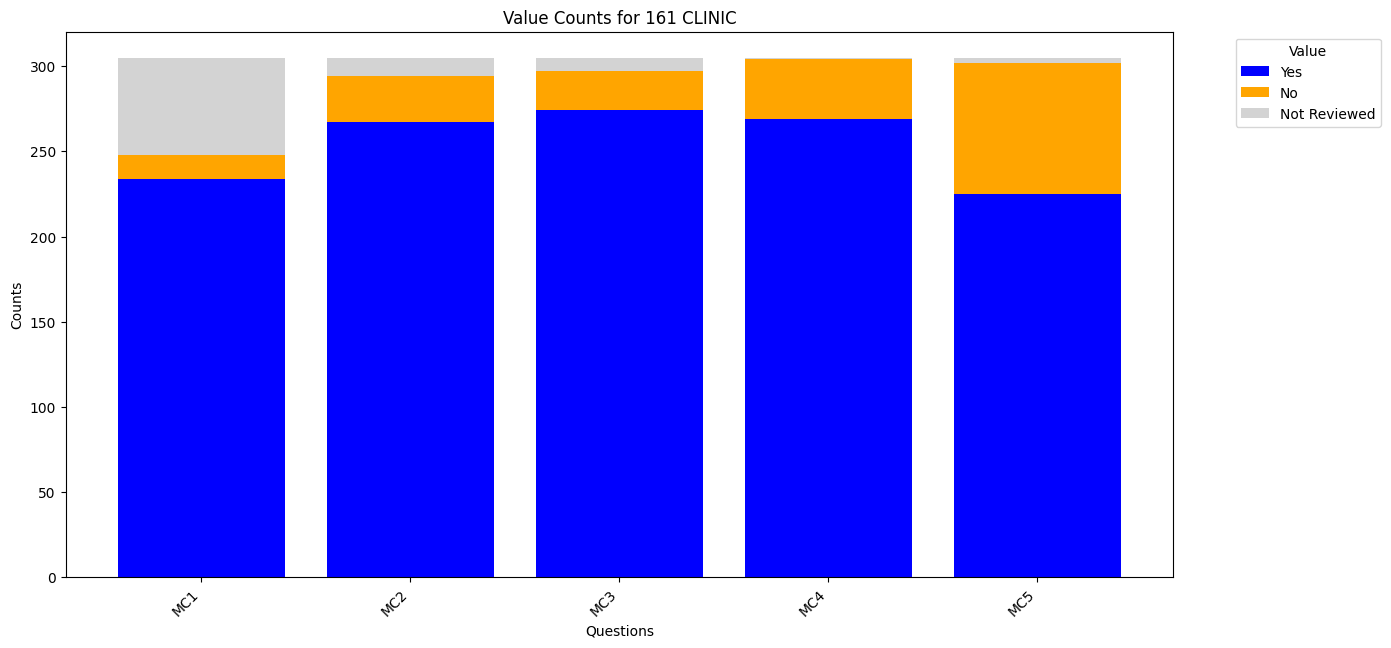

['161_MC1_supervisor (SIM F/S)', '161_MC2_supervisor (SIM F/S)', '161_MC3_supervisor (SIM F/S)', '161_MC4_supervisor (SIM F/S)', '161_MC5_supervisor (SIM F/S)']


,Question,Full Name
0,MC1,Identifies material based on patient history a...
0,MC2,Isolates the tooth/teeth according to the pati...
0,MC3,Prepares tooth surface specific to material se...
0,MC4,Applies sealant to all required pits and fissu...
0,MC5,The sealant is finished (no overextension and ...


Creating table for MC Reference


Student ID  Date      
1402789     23/09/2024    2
1384393     16/09/2024    2
587525      16/09/2024    1
1399220     23/09/2024    1
1391596     16/09/2024    1
            23/09/2024    1
1394123     16/09/2024    1
            23/09/2024    1
1394124     11/09/2024    1
            18/09/2024    1
1394580     16/09/2024    1
            23/09/2024    1
1399214     16/09/2024    1
            23/09/2024    1
1399220     16/09/2024    1
1399221     16/09/2024    1
1391578     16/09/2024    1
1399221     18/09/2024    1
1402031     18/09/2024    1
            23/09/2024    1
            25/09/2024    1
1402035     16/09/2024    1
            23/09/2024    1
1402039     16/09/2024    1
            23/09/2024    1
1402789     16/09/2024    1
1420053     16/09/2024    1
            23/09/2024    1
1420060     16/09/2024    1
1391578     23/09/2024    1
1391557     23/09/2024    1
1329195     16/09/2024    1
1384391     10/09/2024    1
1330715     16/09/2024    1
            23/09/2024   

Mean Squared Error: 3.315510204081632


,Yes,No,Not Reviewed
161_MC1_supervisor (SIM F/S),52,2,189
161_MC2_supervisor (SIM F/S),65,1,177
161_MC3_supervisor (SIM F/S),66,1,176
161_MC4_supervisor (SIM F/S),237,4,2
161_MC5_supervisor (SIM F/S),202,15,26


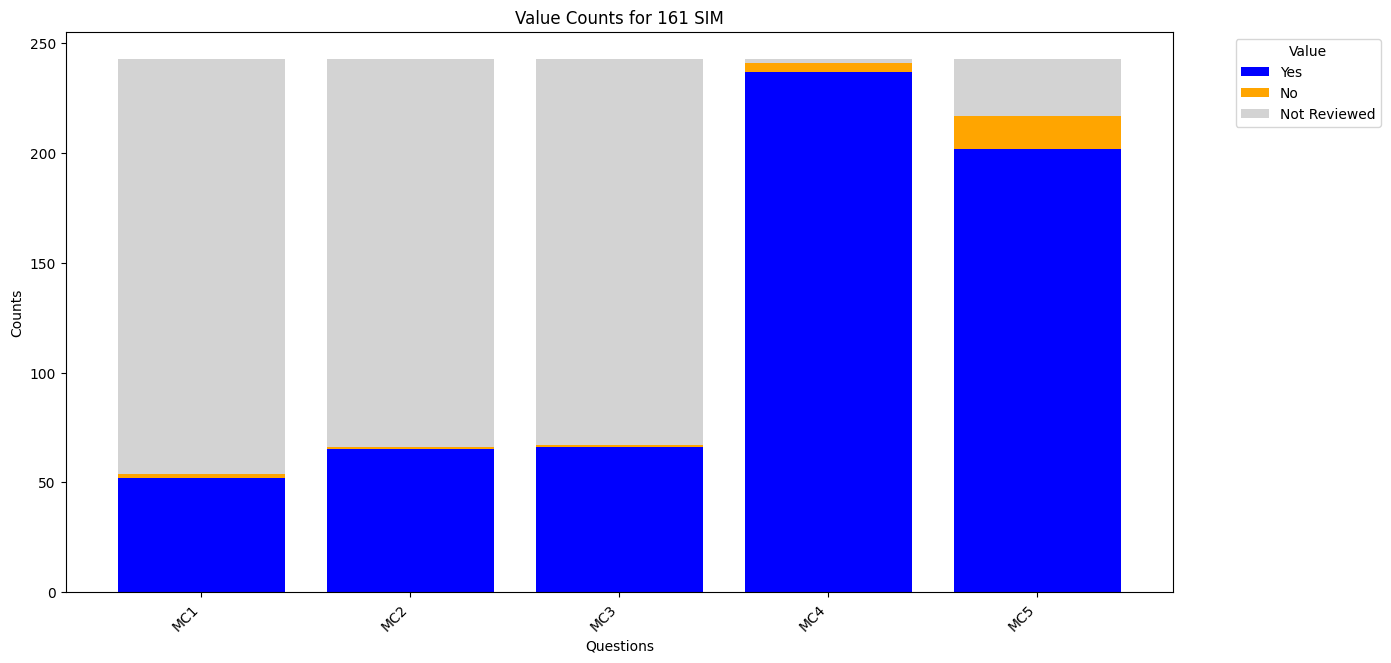

['513_MC1_supervisor (SIM)', '513_MC2_supervisor (SIM)', '513_MC3_supervisor (SIM)', '513_MC4_supervisor (SIM)', '513_MC5_supervisor (SIM)', '513_MC6_supervisor (SIM)', '513_MC7_supervisor (SIM)', '513_MC8_supervisor (SIM)', '513_MC9_supervisor (SIM)', '513_MC10_supervisor (SIM)', '513_MC11_supervisor (SIM)', '513_MC12_supervisor (SIM)', '513_MC13_supervisor (SIM)', '513_MC14_supervisor (SIM)', '513_MC15_supervisor (SIM)']


,Question,Full Name
0,MC1,Isolates the tooth/teeth according to the pati...
0,MC2,Prepares tooth based on extent of caries or fr...
0,MC3,Applies principles of selective caries removal...
0,MC4,Develops retention/resistance form through con...
0,MC5,Prepares approximately 90 degree cavo-surface ...
0,MC6,Creates smooth internal surfaces free of sharp...
0,MC7,Creates smooth external margins
0,MC8,Preservation of hard and soft tissues during p...
0,MC9,"Places a stable matrix, according to tooth and..."
0,MC10,Places liner/base on cavity floor/axial walls ...


Creating table for MC Reference


Student ID  Date      
587525      22/04/2024    1
            29/04/2024    1
1377158     22/04/2024    1
            29/04/2024    1
1383423     22/04/2024    1
            29/04/2024    1
1384390     22/04/2024    1
            29/04/2024    1
1384391     22/04/2024    1
            29/04/2024    1
1384392     22/04/2024    1
            29/04/2024    1
1384393     22/04/2024    1
            29/04/2024    1
1387067     22/04/2024    1
            29/04/2024    1
1388256     22/04/2024    1
            29/04/2024    1
1388600     22/04/2024    1
            29/04/2024    1
1388926     22/04/2024    1
            29/04/2024    1
1389354     22/04/2024    1
1371861     29/04/2024    1
            22/04/2024    1
1330715     29/04/2024    1
1301220     29/04/2024    1
1221853     22/04/2024    1
            29/04/2024    1
1232770     22/04/2024    1
            29/04/2024    1
1287253     22/04/2024    1
            29/04/2024    1
1300764     22/04/2024    1
            29/04/2024   

Mean Squared Error: 47.950190095031445


,Yes,No,Not Reviewed
513_MC1_supervisor (SIM),176,8,8
513_MC2_supervisor (SIM),70,31,91
513_MC3_supervisor (SIM),88,12,92
513_MC4_supervisor (SIM),76,24,92
513_MC5_supervisor (SIM),70,29,93
513_MC6_supervisor (SIM),78,21,93
513_MC7_supervisor (SIM),69,31,92
513_MC8_supervisor (SIM),67,31,94
513_MC9_supervisor (SIM),83,6,103
513_MC10_supervisor (SIM),60,27,105


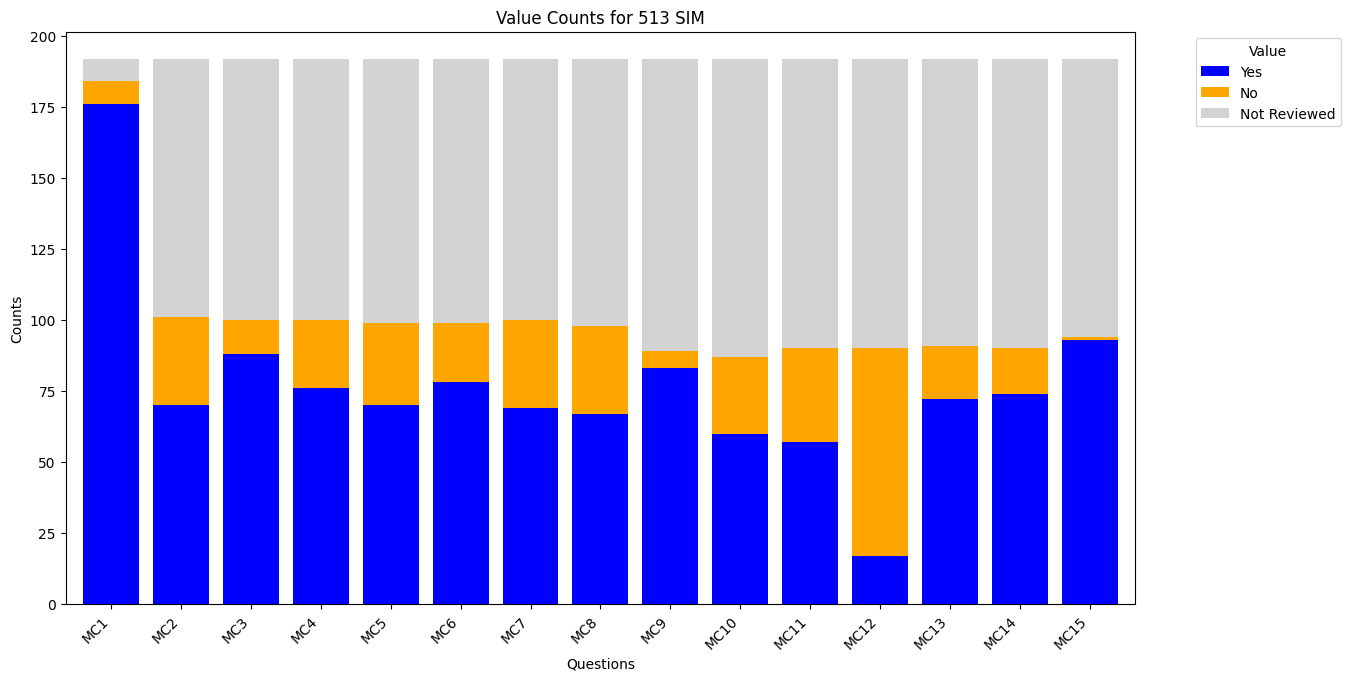

['524_MC1_supervisor (CLINIC)', '524_MC2_supervisor (CLINIC)', '524_MC3_supervisor (CLINIC)', '524_MC4_supervisor (CLINIC)', '524_MC5_supervisor (CLINIC)', '524_MC6_supervisor (CLINIC)', '524_MC7_supervisor (CLINIC)', '524_MC8_supervisor (CLINIC)', '524_MC9_supervisor (CLINIC)', '524_MC10_supervisor (CLINIC)', '524_MC11_supervisor (CLINIC)', '524_MC12_supervisor (CLINIC)']


,Question,Full Name
0,MC1,Identifies material and need for isolation ba...
0,MC2,Isolates the tooth/teeth according to the pati...
0,MC3,Preparation of tooth according to caries locat...
0,MC4,Applies principles of selective caries removal...
0,MC5,Selection of matrix according to tooth related...
0,MC6,Placement and stabilisation of matrix material...
0,MC7,Chemically prepares tooth surface specific to ...
0,MC8,Material placement according to cavity design ...
0,MC9,Contours restoration to ensure anatomy is rest...
0,MC10,The restoration is finished (i.e. material is ...


Creating table for MC Reference


Student ID  Date      
993257      06/08/2024    1
1067694     09/10/2024    1
            11/09/2024    1
1080594     11/09/2024    1
1217909     22/10/2024    1
1354025     02/10/2024    1
1354147     23/09/2024    1
1377061     14/10/2024    1
1473169     29/07/2024    1
dtype: int64

Mean Squared Error: 6.447314049586633


,Yes,No,Not Reviewed
524_MC1_supervisor (CLINIC),9.0,NaN,NaN
524_MC2_supervisor (CLINIC),9.0,NaN,NaN
524_MC3_supervisor (CLINIC),9.0,NaN,NaN
524_MC4_supervisor (CLINIC),7.0,NaN,2.0
524_MC5_supervisor (CLINIC),7.0,NaN,2.0
524_MC6_supervisor (CLINIC),7.0,NaN,2.0
524_MC7_supervisor (CLINIC),9.0,NaN,NaN
524_MC8_supervisor (CLINIC),9.0,NaN,NaN
524_MC9_supervisor (CLINIC),8.0,1.0,NaN
524_MC10_supervisor (CLINIC),7.0,2.0,NaN


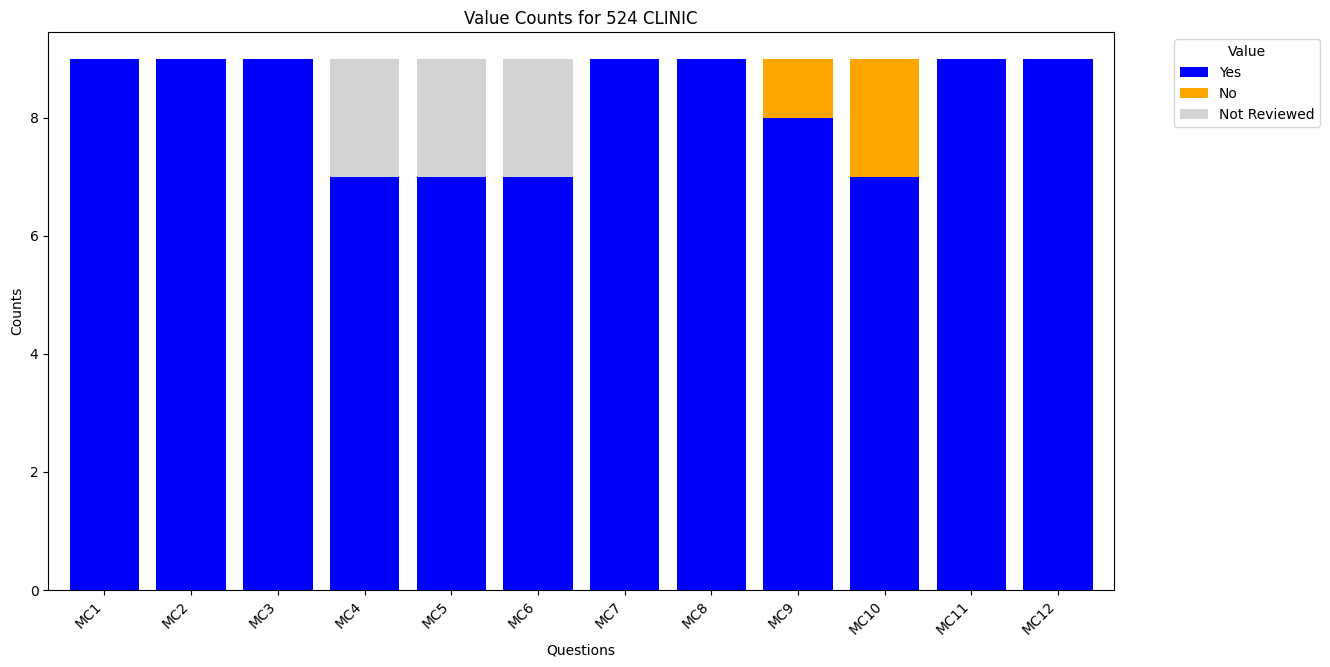

['524_MC1_supervisor (SIM)', '524_MC2_supervisor (SIM)', '524_MC3_supervisor (SIM)', '524_MC4_supervisor (SIM)', '524_MC5_supervisor (SIM)', '524_MC6_supervisor (SIM)', '524_MC7_supervisor (SIM)', '524_MC8_supervisor (SIM)', '524_MC9_supervisor (SIM)', '524_MC10_supervisor (SIM)', '524_MC11_supervisor (SIM)', '524_MC12_supervisor (SIM)', '524_MC13_supervisor (SIM)']


,Question,Full Name
0,MC1,Isolates the tooth/teeth according to the pati...
0,MC2,Prepares cavity based on extent of caries or f...
0,MC3,Applies principles of selective caries removal...
0,MC4,Creates smooth internal surfaces free of sharp...
0,MC5,Creates smooth margins
0,MC6,"Places a stable matrix, according to tooth and..."
0,MC7,Follows bonding protocol specific to material ...
0,MC8,Places restorative material generally free of ...
0,MC9,"Finishes and polishes, ensuring restoration is..."
0,MC10,"Recreates original tooth morphology, with occl..."


Creating table for MC Reference


Student ID  Date      
1452784     08/05/2024    2
1472810     08/05/2024    2
1443777     07/05/2024    2
1472800     08/05/2024    2
1463879     08/05/2024    2
1472336     08/05/2024    2
1452672     08/05/2024    2
1469076     08/05/2024    2
1472717     07/05/2024    2
1461239     08/05/2024    2
1472645     07/05/2024    2
1469829     07/05/2024    2
1472637     07/05/2024    2
1452755     08/05/2024    2
1088656     08/05/2024    2
1472625     07/05/2024    2
1452767     08/05/2024    2
1472568     08/05/2024    2
            06/03/2024    2
1462155     07/05/2024    2
1472266     08/05/2024    2
1460391     08/05/2024    2
1472447     07/05/2024    2
1472277     07/05/2024    2
1384392     26/02/2024    2
1463879     06/03/2024    2
1464586     07/05/2024    2
1460189     08/05/2024    2
1420083     26/02/2024    2
1461861     08/05/2024    2
1461909     07/05/2024    2
1462377     08/05/2024    2
1212518     26/02/2024    2
1473013     07/05/2024    2
1473169     07/05/2024   

Mean Squared Error: 97.09390914266574


,Yes,No,Not Reviewed
524_MC1_supervisor (SIM),329,9,107
524_MC2_supervisor (SIM),116,25,304
524_MC3_supervisor (SIM),23,7,415
524_MC4_supervisor (SIM),138,21,286
524_MC5_supervisor (SIM),291,38,116
524_MC6_supervisor (SIM),351,23,71
524_MC7_supervisor (SIM),354,23,68
524_MC8_supervisor (SIM),249,167,29
524_MC9_supervisor (SIM),152,241,52
524_MC10_supervisor (SIM),250,147,48


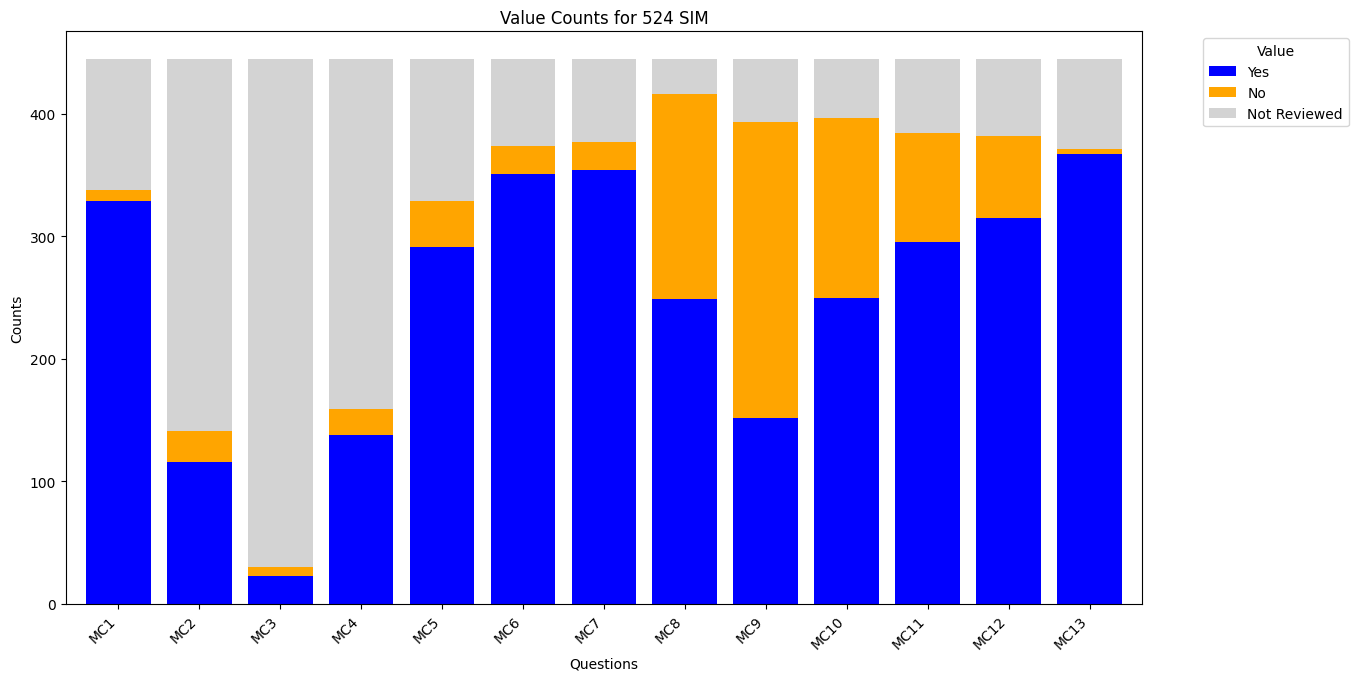

['531_MC1_supervisor (CLINIC)', '531_MC2_supervisor (CLINIC)', '531_MC3_supervisor (CLINIC)', '531_MC4_supervisor (CLINIC)', '531_MC5_supervisor (CLINIC)', '531_MC6_supervisor (CLINIC)', '531_MC7_supervisor (CLINIC)', '531_MC8_supervisor (CLINIC)', '531_MC9_supervisor (CLINIC)', '531_MC10_supervisor (CLINIC)', '531_MC11_supervisor (CLINIC)']


,Question,Full Name
0,MC1,Identifies material and need for isolation ba...
0,MC2,Isolates the tooth/teeth according to the pati...
0,MC3,Preparation of tooth according to caries locat...
0,MC4,Applies principles of selective caries removal...
0,MC5,Selection of matrix according to tooth related...
0,MC6,Chemically prepares tooth surface specific to ...
0,MC7,Material placement according to cavity design ...
0,MC8,Contours restoration to ensure anatomy is rest...
0,MC9,The restoration is finished (i.e. material is ...
0,MC10,Preservation of hard and soft tissues during p...


Creating table for MC Reference


Student ID  Date      
1472445     02/10/2024    2
1469829     14/10/2024    2
1472938     09/09/2024    2
1462377     11/10/2024    1
1472336     04/10/2024    1
1472277     09/09/2024    1
            02/10/2024    1
1472250     18/10/2024    1
            11/09/2024    1
1469829     16/10/2024    1
1464586     20/09/2024    1
1463403     04/10/2024    1
1463086     09/08/2024    1
1462155     18/10/2024    1
1472445     01/10/2024    1
1461909     17/09/2024    1
1461861     20/09/2024    1
            06/09/2024    1
1461567     20/09/2024    1
            17/09/2024    1
            14/08/2024    1
            09/09/2024    1
            05/08/2024    1
1460683     02/09/2024    1
1472336     11/10/2024    1
900511      09/07/2024    1
1452798     11/10/2024    1
1472717     13/09/2024    1
1473826     16/09/2024    1
1473664     14/10/2024    1
1473073     30/08/2024    1
            18/10/2024    1
            09/09/2024    1
1473013     14/10/2024    1
            14/08/2024   

PermissionError: [Errno 13] Permission denied: 'FullSpreadsheets\\CAF+v0.1_December+5,+2024\\IRT\\531_CLINIC.csv'

In [71]:
irtFolder = folder + '\\IRT'
os.makedirs(irtFolder, exist_ok=True)

jsonfile = 'data\MC Reference Dictionary.json'
with open(jsonfile, 'r') as f:
    renamedict = json.load(f)

codenumberlist=[161, 531, 532, 533, 524, 513]
codenumberlist = [str(x) for x in codenumberlist]
elements = []
Checklistcolors = {'Yes': 'blue', 'No': 'orange', 'Not Reviewed': 'lightgrey'}
def getImportance(code):
    newDf = codeDict[code]
    
    codenumber = code.split('_')[0]
    if codenumber not in codenumberlist:
        return

    newDf.replace({'Yes': 1, 'No': 0, 'Not Assessed': np.nan, 'Not Reviewed': np.nan}, inplace=True)
    mc_columns_test = find_mc_columns(newDf, code.split('_')[0])
    mc_columns_test = [col for col in mc_columns_test if 'supervisor' in col]
    # newDf = newDf[mc_columns_test + rubricQues]
    print(mc_columns_test)
    fullnameDf = pd.DataFrame(columns = ['Question', 'Full Name'])
    for col in mc_columns_test:
        if col in renamedict.keys():
            fullnameDf = pd.concat([fullnameDf, pd.DataFrame({'Question': [col.split("_")[1]], 'Full Name': [renamedict[col]]})])
    display(fullnameDf)
    nametable = createTable(fullnameDf, 'MC Reference', [1, 8], customTextCols=[1])
    
    
    colmcTotal = 'MC Total'
    colmcTotalPossible = 'MC total possible'
    newDf[colmcTotal] = newDf[mc_columns_test].sum(axis=1, skipna=True).astype(int)
    newDf[colmcTotalPossible] = newDf[mc_columns_test].count(axis=1)
    # newDf = newDf[(newDf[colmcTotalPossible]>5)]
    # remove nan values
    
    # display(newDf.head(20))
    colmcPercent= 'MC %'
    newDf[colmcPercent] = (newDf[colmcTotal]/newDf[colmcTotalPossible]*100)
    newDf = newDf.dropna(subset=[colmcTotal, colmcTotalPossible, colmcPercent])
    # group data by student id and data and see the size of the group
    newDfgrouped = newDf.groupby([colId, colDate])
    display(newDfgrouped.size().sort_values(ascending=False))
    newDf.to_csv(f'{irtFolder}\\{code}.csv')
    # Split the data into training and testing sets
    X = newDf[mc_columns_test]
    y = newDf[colmcPercent]


    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    # print(X_imputed)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Get feature importances
    feature_importances = model.feature_importances_
    feature_names = X.columns
    feature_names = [x.split('_')[1] for x in feature_names]

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)


    # Plot the feature importances
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    # plt.title(f'Feature Importances for {code.replace("_", " ")}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    # plt.show()
    image = addPlotImage(fig, 0.9)
    # Get counts of each type of value
    value_counts_dict = {}
    for column in X.columns:
        value_counts_dict[column] = X[column].value_counts(dropna=False)

    # Convert value counts dictionary to a DataFrame
    value_counts_df = pd.DataFrame(value_counts_dict)

    # Transpose the DataFrame for plotting
    value_counts_df = value_counts_df.T
    value_counts_df.columns = value_counts_df.columns.astype(str)  # Ensure column names are strings for plotting
    value_counts_df.rename(columns={'nan': 'Not Reviewed', '1.0': 'Yes', '0.0': 'No'}, inplace=True)  # Rename 'nan' column to 'NaN'
    value_counts_df = value_counts_df[['Yes', 'No', 'Not Reviewed']]  # Reorder columns for plotting
    display(value_counts_df)
    # Plotting the grouped bar chart
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    value_counts_df.plot(kind='bar', figsize=(14, 8), width=0.8, stacked=True, color = Checklistcolors, ax=ax)
    plt.title(f'Value Counts for {code.replace("_", " ")}')
    plt.xlabel('Questions')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    ax.set_xticklabels([x.split('_')[1] for x in value_counts_df.index], rotation=45, ha='right')
    plt.show()
    image2 = addPlotImage(fig, 0.9)

    elements.append(Paragraph(f'Feature Importances for {code.replace("_", " ")}', subheadingStyle))
    elements.append(Spacer(1, 0.5*inch))
    elements.append(image)
    elements.append(Spacer(1, 0.5*inch))
    elements.append(image2)
    elements.append(Spacer(1, 0.5*inch))
    elements.append(nametable)
    elements.append(PageBreak())

# getImportance
for code in codeDict.keys():
    getImportance(code)
    # break
from reportlab.lib.pagesizes import letter, landscape, A4, A3
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, PageBreak, Paragraph, Spacer, Image
from reportlab.lib import colors
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.platypus import Paragraph, Spacer, KeepTogether, KeepInFrame
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch


pdf = SimpleDocTemplate(f'{irtFolder}\\Importance 2.pdf', pagesize=pageSize, leftMargin = leftMargin, rightMargin = rightMargin, topMargin = topMargin, bottomMargin = bottomMargin)
pdf.build(elements)


Not marking each thing as it is. Bias with MC items v/s PS, TS, ES, CS. Are the assessors using the most predictive questions as a proxy.

Create a table for proportion of not assessed, one parameter model of IRT. Infit, itemfit and outfit statistics to see how well the model works. WLE reliability. 
- Common checklist items among the codes. 
- IRT for each code and each supervisor to see how much luck is involved.
- Find the most items are students are completing and which students are not. 